# Zillow Home Price Prediction
# 
## The aim of the project is to feed the Zillow House Price dataset into a machine learning algorithm and predict whether or not house prices in the selected region will drop or increase

In [38]:
import pandas as pd
import numpy as np

#make sure to change the destination of the dataset files to appropriate destinations for your files before running
data_files = ["C:/Users/ssagn/Desktop/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv", 'C:/Users/ssagn/Desktop/Metro_median_sale_price_uc_sfrcondo_week.csv']

data = [pd.read_csv(f) for f in data_files]

In [39]:
data[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,102001,0,United States,country,NaN,109323.629012,109154.034652,109213.959881,109422.056145,109671.155085,...,329433.472878,334293.345957,340125.707301,346203.327354,352717.394829,356945.667516,359718.579670,359350.224752,358215.302365,358282.930208
1,394913,1,"New York, NY",msa,NY,188630.801041,186913.221718,186527.685745,186211.464806,186103.395161,...,578138.406356,583150.964369,588772.302789,598951.858207,607927.900018,615720.125097,619986.876586,621573.137884,620501.194989,619774.445218
2,753899,2,"Los Angeles, CA",msa,CA,187073.406162,186404.133695,186112.156345,186088.465059,185957.334353,...,876723.868168,889963.205427,904246.758327,933355.266190,952799.735114,957843.917793,935600.608825,931697.594288,900374.452615,895380.194948
3,394463,3,"Chicago, IL",msa,IL,146964.023727,146963.247033,146044.835204,147462.728548,147990.841500,...,291249.773498,294058.217797,297901.790214,303296.872553,308010.078892,313226.936837,314276.284782,313372.734249,311777.448413,311695.705112
4,394514,4,"Dallas, TX",msa,TX,113039.806652,112955.588792,113275.209782,113802.713604,114041.578204,...,350430.532764,359104.687712,369655.417004,375712.080035,390853.930211,398753.637650,400391.557757,396049.916286,390557.183060,389153.087426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,753929,923,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,122586.267065,124095.324022,125062.657353,124789.235158,125070.923152,124781.552505,128142.450231,128546.171013,129048.316681,130240.580492
895,394743,924,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,NaN,372600.407383,370189.434968,372026.499351,374196.134784,376705.427276,384565.040365,385447.564530,387188.764342,390135.795433
896,753874,925,"Craig, CO",msa,CO,71599.787477,71882.476461,72295.302150,72835.365320,72263.392965,...,273095.086356,274342.567596,273023.005641,274838.682701,274354.615458,275677.116057,286964.604193,288810.865980,290297.271120,292595.671146
897,394767,926,"Lamesa, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,104076.813159,105062.235344,106979.856709,108129.096248,108441.730189,110521.982816,113167.060566,113648.097476,113896.675429,113298.679092


In [40]:
data[1]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-05-07,2022-05-14,2022-05-21,2022-05-28,2022-06-04,2022-06-11,2022-06-18,2022-06-25,2022-07-02,2022-07-09
0,102001,0,United States,Country,NaN,190000.0,190000.0,193000.0,189900.0,194900.0,...,369900.0,370000.0,370000.0,375000.0,375000.0,370000.0,375000.0,370000.0,370000.0,362500.0
1,394913,1,"New York, NY",Msa,NY,400000.0,418250.0,420000.0,420000.0,400000.0,...,550000.0,555000.0,550000.0,575000.0,575000.0,578000.0,590000.0,582000.0,585000.0,595000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,497500.0,515000.0,520000.0,525000.0,498250.0,...,914000.0,925000.0,925000.0,951000.0,950000.0,920500.0,925000.0,900000.0,900500.0,906000.0
3,394463,3,"Chicago, IL",Msa,IL,245000.0,245000.0,251000.0,255000.0,255000.0,...,315000.0,310000.0,315500.0,315000.0,330000.0,324950.0,335000.0,325000.0,325000.0,315000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,144250.0,148900.0,139000.0,143700.0,145900.0,...,422000.0,430000.0,430000.0,425000.0,440000.0,425000.0,427750.0,426000.0,420000.0,420000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,394528,90,"Daytona Beach, FL",Msa,FL,NaN,170000.0,182400.0,170000.0,170000.0,...,340500.0,345000.0,327700.0,345000.0,350000.0,343250.0,359900.0,352000.0,336000.0,342990.0
80,394531,91,"Des Moines, IA",Msa,IA,138000.0,160000.0,150000.0,151750.0,154500.0,...,270000.0,285250.0,295000.0,273450.0,301000.0,290000.0,300900.0,281900.0,289250.0,280000.0
81,395006,100,"Provo, UT",Msa,UT,NaN,206000.0,215500.0,210000.0,210000.0,...,527000.0,540000.0,535000.0,552500.0,543750.0,571000.0,530300.0,569900.0,539950.0,572500.0
82,394549,104,"Durham, NC",Msa,NC,210000.0,170000.0,170500.0,197500.0,180000.0,...,456000.0,450000.0,428500.0,480000.0,465000.0,440000.0,450250.0,416000.0,465000.0,435250.0


In [41]:
d = data[1]
d.iloc[82]

RegionID          394549
SizeRank             104
RegionName    Durham, NC
RegionType           Msa
StateName             NC
                 ...    
2022-06-11      440000.0
2022-06-18      450250.0
2022-06-25      416000.0
2022-07-02      465000.0
2022-07-09      435250.0
Name: 82, Length: 759, dtype: object

In [42]:
regionCode = int(input("Enter the region ID of the region to be used: "))

found = False
for df in data:
    if (regionCode in df["RegionID"].values):
       found = True
    else:
        found = False

if found == True:
    
    d0 = data[0]
    d1 = data[1]
    index = []
    for d in (d0, d1):
        index.append(d[d["RegionID"] == regionCode].index[0])
    
    print(index[0], index[1])
    #data["RegionID"]==regionCode].index
    
elif found == False:
    print("The region code you entered was not found in both databases")


Enter the region ID of the region to be used: 394549
90 82


In [43]:
data = [pd.DataFrame(data[0].iloc[index[0],5:]), pd.DataFrame(data[1].iloc[index[1],5:])]

In [44]:
data[0]

,90
1996-01-31,139980.239329
1996-02-29,140885.931449
1996-03-31,140831.742112
1996-04-30,141563.058131
1996-05-31,143197.942594
...,...
2022-05-31,435532.412846
2022-06-30,438793.577461
2022-07-31,436063.130876
2022-08-31,431921.195175


In [45]:
data[1]

,82
2008-02-02,210000.0
2008-02-09,170000.0
2008-02-16,170500.0
2008-02-23,197500.0
2008-03-01,180000.0
...,...
2022-06-11,440000.0
2022-06-18,450250.0
2022-06-25,416000.0
2022-07-02,465000.0


In [46]:
for df in data:
    df.index = pd.to_datetime(df.index)
    df["month"] = df.index.to_period("M")

In [47]:
data[1]

,82,month
2008-02-02,210000.0,2008-02
2008-02-09,170000.0,2008-02
2008-02-16,170500.0,2008-02
2008-02-23,197500.0,2008-02
2008-03-01,180000.0,2008-03
...,...,...
2022-06-11,440000.0,2022-06
2022-06-18,450250.0,2022-06
2022-06-25,416000.0,2022-06
2022-07-02,465000.0,2022-07


In [48]:
price_data = data[0].merge(data[1], on ="month")

In [49]:
price_data.index = data[1].index

In [50]:
del price_data["month"]
price_data.columns = ["price", "value"]

price_data

,price,value
2008-02-02,218470.103909,210000.0
2008-02-09,218470.103909,170000.0
2008-02-16,218470.103909,170500.0
2008-02-23,218470.103909,197500.0
2008-03-01,218918.043454,180000.0
...,...,...
2022-06-11,438793.577461,440000.0
2022-06-18,438793.577461,450250.0
2022-06-25,438793.577461,416000.0
2022-07-02,436063.130876,465000.0


In [51]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2008-02-02 to 2022-07-09
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   750 non-null    object
 1   value   754 non-null    object
dtypes: object(2)
memory usage: 17.7+ KB


<AxesSubplot:>

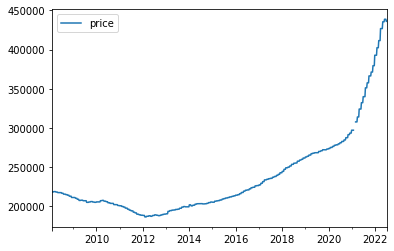

In [52]:
price_data.plot.line(y = "price", use_index = True)

<AxesSubplot:>

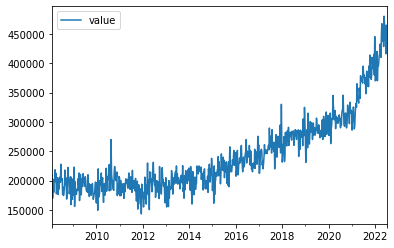

In [53]:
price_data.plot.line(y = "value", use_index = True)

In [54]:
price_data["next quarter"] = price_data["price"].shift(-12)

In [55]:
price_data

,price,value,next quarter
2008-02-02,218470.103909,210000.0,218344.356741
2008-02-09,218470.103909,170000.0,217638.593882
2008-02-16,218470.103909,170500.0,217638.593882
2008-02-23,218470.103909,197500.0,217638.593882
2008-03-01,218918.043454,180000.0,217638.593882
...,...,...,...
2022-06-11,438793.577461,440000.0,NaN
2022-06-18,438793.577461,450250.0,NaN
2022-06-25,438793.577461,416000.0,NaN
2022-07-02,436063.130876,465000.0,NaN


In [56]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2008-02-02 to 2022-07-09
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         750 non-null    object
 1   value         754 non-null    object
 2   next quarter  738 non-null    object
dtypes: object(3)
memory usage: 23.6+ KB


In [57]:
price_data.dropna(inplace = True)

price_data

,price,value,next quarter
2008-02-02,218470.103909,210000.0,218344.356741
2008-02-09,218470.103909,170000.0,217638.593882
2008-02-16,218470.103909,170500.0,217638.593882
2008-02-23,218470.103909,197500.0,217638.593882
2008-03-01,218918.043454,180000.0,217638.593882
...,...,...,...
2022-03-19,411559.964523,415000.0,438793.577461
2022-03-26,411559.964523,432500.0,438793.577461
2022-04-02,426886.908281,425000.0,438793.577461
2022-04-09,426886.908281,410000.0,436063.130876


In [58]:
price_data["change"] = (price_data["next quarter"] > price_data["value"]).astype(int)

price_data

,price,value,next quarter,change
2008-02-02,218470.103909,210000.0,218344.356741,1
2008-02-09,218470.103909,170000.0,217638.593882,1
2008-02-16,218470.103909,170500.0,217638.593882,1
2008-02-23,218470.103909,197500.0,217638.593882,1
2008-03-01,218918.043454,180000.0,217638.593882,1
...,...,...,...,...
2022-03-19,411559.964523,415000.0,438793.577461,1
2022-03-26,411559.964523,432500.0,438793.577461,1
2022-04-02,426886.908281,425000.0,438793.577461,1
2022-04-09,426886.908281,410000.0,436063.130876,1


In [59]:
price_data["change"].value_counts()

0    411
1    323
Name: change, dtype: int64

In [60]:
predictors = ["price", "value", "next quarter"]
target = "change"


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [62]:
start = 260
step = 52

def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split = 10, random_state = 1)
    rf.fit(train[predictors], train[target])
    preds = rf.predict(test[predictors])
    return preds

def test(data, predictors, target):
    all_preds = []
    for i in range(start, data.shape[0], step):
        train = price_data.iloc[:i]
        test = price_data.iloc[i:(i+step)]
        all_preds.append(predict(train, test, predictors, target))
        
    preds= np.concatenate(all_preds)
    return preds, accuracy_score(data.iloc[start:][target], preds)

In [63]:
preds, accuracy = test(price_data, predictors, target)

In [64]:
accuracy_metrics = []

accuracy_metrics.append(accuracy)

accuracy

0.6940928270042194

In [65]:
recent = price_data.rolling(52, min_periods = 1).mean()

recent_ratio = [p + "_year" for p in predictors]

price_data[recent_ratio] = price_data[predictors] / recent[predictors]

price_data

,price,value,next quarter,change,price_year,value_year,next quarter_year
2008-02-02,218470.103909,210000.0,218344.356741,1,1.0,1.0,1.0
2008-02-09,218470.103909,170000.0,217638.593882,1,1.0,0.894737,0.998381
2008-02-16,218470.103909,170500.0,217638.593882,1,1.0,0.929155,0.99892
2008-02-23,218470.103909,197500.0,217638.593882,1,1.0,1.05615,0.99919
2008-03-01,218918.043454,180000.0,217638.593882,1,1.00164,0.969828,0.999352
...,...,...,...,...,...,...,...
2022-03-19,411559.964523,415000.0,438793.577461,1,1.14469,1.093246,1.140206
2022-03-26,411559.964523,432500.0,438793.577461,1,1.138373,1.135464,1.134172
2022-04-02,426886.908281,425000.0,438793.577461,1,1.173728,1.111191,1.128201
2022-04-09,426886.908281,410000.0,436063.130876,1,1.166772,1.068374,1.115881


In [66]:
preds, accuracy = test(price_data, predictors + recent_ratio, target)

In [67]:
accuracy_metrics.append(accuracy)

accuracy_metrics

[0.6940928270042194, 0.8713080168776371]

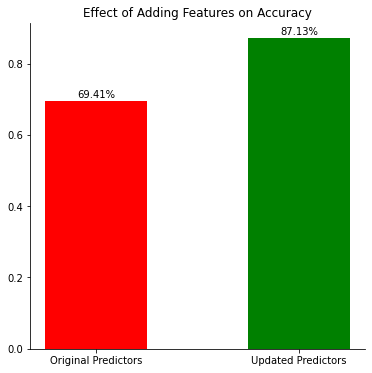

In [68]:
import matplotlib.pyplot as plt

x_label = ["Original Predictors", "Updated Predictors"]
fig,ax = plt.subplots(figsize = (6,6))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.bar(x_label, accuracy_metrics, width = 0.5, color = ["red", "green"])

for i in range(len(x_label)):
    plt.text(x_label[i], accuracy_metrics[i]+0.01, f"{(accuracy_metrics[i]*100).round(2)}%", ha = 'center')
        
plt.title("Effect of Adding Features on Accuracy")
plt.show()

In [69]:
pred_match = (preds == price_data[target].iloc[start:])

pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"

<AxesSubplot:xlabel='index', ylabel='value'>

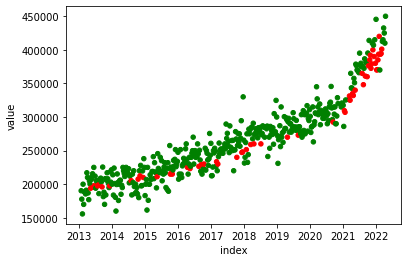

In [70]:
plot_pred = price_data.iloc[start:].copy()

plot_pred.reset_index().plot.scatter(x = "index", y ="value", color = pred_match)

In [71]:
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split = 10, random_state = 1)
rf.fit(price_data[predictors+recent_ratio], price_data[target])

result = permutation_importance(rf, price_data[predictors+recent_ratio], price_data[target], n_repeats = 10, random_state = 1)

result["importances_mean"]

array([0.01852861, 0.26280654, 0.04713896, 0.01117166, 0.27179837,
       0.02207084])

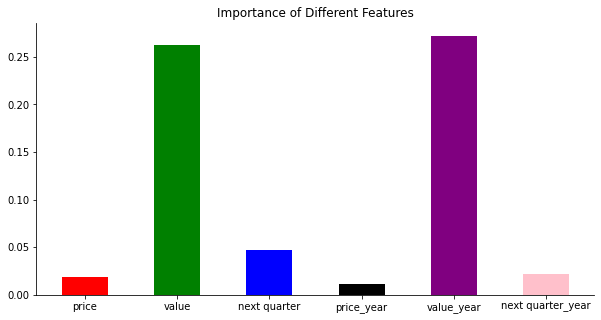

In [72]:
x_label = predictors + recent_ratio

fig,ax = plt.subplots(figsize = (10,5))


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.bar(x_label, result["importances_mean"], width = 0.5, color = ["red", "green", "blue", "black", "purple", "pink"])
        
plt.title("Importance of Different Features")
plt.show()